In [423]:
import pandas as pd
#read csv /Users/jasperhewitt/Desktop/github_repos/Campaigning_101/data/save_for_label_df_DONE_1.csv
df_attack=pd.read_csv('/Users/jasperhewitt/Desktop/github_repos/Campaigning_101/data/save_for_label_df_DONE_1.csv')
df_attack_2=pd.read_csv('/Users/jasperhewitt/Desktop/github_repos/Campaigning_101/data/save_for_label_df_DONE_2.csv')

In [424]:
#add the two dataframes together
df_attack = pd.concat([df_attack, df_attack_2])


In [425]:
len(df_attack)

544

In [426]:
#check values in attack column
df_attack['attack'].value_counts()

attack
yes    334
no     210
Name: count, dtype: int64

In [427]:
#only keep the columns where 'attack' is 'yes'
df_attack_yes=df_attack[df_attack['attack']=='yes']


In [428]:
#df_attack_yes delete Type == 'Live Video Complete' and 'Live Video Scheduled'
# df_attack_yes=df_attack_yes[df_attack_yes['Type']!='Live Video Complete']
# df_attack_yes=df_attack_yes[df_attack_yes['Type']!='Live Video Scheduled']

In [429]:
df_attack_yes['User Name'].value_counts()

User Name
houyuih         163
DoctorKoWJ      104
chingte          34
TerryGou1018     33
Name: count, dtype: int64

In [430]:
df_attack_yes.columns

Index(['Unnamed: 0', 'serial_number', 'User Name', 'URL', 'Post Created',
       'combined_text', 'mention_other', 'mentioned_other', 'attack', 'target',
       'description'],
      dtype='object')

/var/folders/kf/vzjyh1g17x3gw7hgly31fnc80000gn/T/ipykernel_35349/512908471.py:6: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

/var/folders/kf/vzjyh1g17x3gw7hgly31fnc80000gn/T/ipykernel_35349/512908471.py:6: FutureWarning:

Parsing '{res.tzname}' as tzlocal (dependent on system timezone) is deprecated and will raise in a future version. Pass the 'tz' keyword or call tz_localize after construction instead

/var/folders/kf/vzjyh1g17x3gw7hgly31fnc80000gn/T/ipykernel_35349/512908471.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/kf/vzjyh1g17x3gw7hgly31fnc80000gn/T/ipykernel_35349/512908471.py:9:

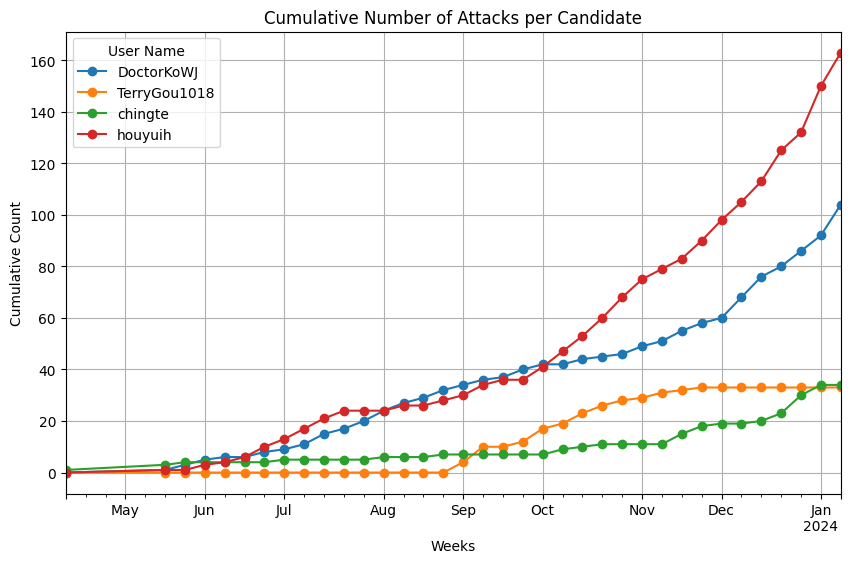

In [431]:
#plot df_attack_yes 
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Post Created' is the column containing the timestamp
df_attack_yes['Post Created'] = pd.to_datetime(df_attack_yes['Post Created'])

# Create a new column for the week
df_attack_yes['Week'] = df_attack_yes['Post Created'].dt.to_period('W')

# Group by 'Week' and 'User Name', then count occurrences
grouped_data = df_attack_yes.groupby(['Week', 'User Name']).size().reset_index(name='Count')

# Pivot the DataFrame to have 'User Name' as columns
pivot_data = grouped_data.pivot(index='Week', columns='User Name', values='Count').fillna(0)

# Create a cumulative sum for each column
cumulative_data = pivot_data.cumsum()

# Plotting
cumulative_data.plot.line(figsize=(10, 6), marker='o')

# Customize the plot
plt.title('Cumulative Number of Attacks per Candidate')
plt.xlabel('Weeks')
plt.ylabel('Cumulative Count')
plt.legend(title='User Name')
plt.grid(True)
plt.show()


# calculate average number of interactions for the attack posts

## merge the df with the original csv 

In [432]:
#attack_df 
df_attack=pd.read_csv('/Users/jasperhewitt/Desktop/github_repos/Campaigning_101/data/save_for_label_df_DONE_1.csv')
df_attack_2=pd.read_csv('/Users/jasperhewitt/Desktop/github_repos/Campaigning_101/data/save_for_label_df_DONE_2.csv')

#original df read /Users/jasperhewitt/Desktop/github_repos/Campaigning_101/data/filtered_df.csv
filtered_df=pd.read_csv('/Users/jasperhewitt/Desktop/github_repos/Campaigning_101/data/filtered_df.csv')
#read /Users/jasperhewitt/Desktop/github_repos/Campaigning_101/data/filtered_df_2.csv
filtered_df_2=pd.read_csv('/Users/jasperhewitt/Desktop/github_repos/Campaigning_101/data/filtered_df_2.csv')

In [433]:
#merge the two dataframes together on the columns serial_number, User Name, URL, Post Created
df_attack_merge=pd.merge(filtered_df, df_attack, on=['serial_number', 'User Name', 'URL', 'Post Created', 'combined_text'], how='left')

print(len(df_attack_merge))
#check value in attack column, also show how many nan 
df_attack_merge['attack'].value_counts(dropna=False)

1372


attack
NaN    967
yes    233
no     172
Name: count, dtype: int64

In [434]:
#merge df_attack_2 with filtered_df_2 on the same columns 
df_attack_merge_2=pd.merge(filtered_df_2, df_attack_2, on=['serial_number', 'User Name', 'URL', 'Post Created', 'combined_text'], how='left')

print(len(df_attack_merge_2))
#check value in attack column, also show how many nan
df_attack_merge_2['attack'].value_counts(dropna=False)

385


attack
NaN    250
yes     98
no      37
Name: count, dtype: int64

In [435]:
#overwrite the serial_number column in df_attack_merge_2 so that it starts counting from where df_attack_merge left off
df_attack_merge_2['serial_number']=df_attack_merge['serial_number'].max()+df_attack_merge_2['serial_number']

#concatenate the two dataframes together
main_df = pd.concat([df_attack_merge, df_attack_merge_2])
# print len of main_df
print(len(main_df))

#show attack values including nan of main_df
main_df['attack'].value_counts(dropna=False)

1757


attack
NaN    1217
yes     331
no      209
Name: count, dtype: int64

In [436]:
#delete type where Type is 'Live Video Complete' and 'Live Video Scheduled'
main_df=main_df[main_df['Type']!='Live Video Complete']
main_df=main_df[main_df['Type']!='Live Video Scheduled']
len(main_df)


1524

In [437]:
#create a new column called df_attack_yes that only contains the rows where attack is 'yes'
df_attack_yes=main_df[main_df['attack']=='yes']
len(df_attack_yes)
#check Username value coounts 
df_attack_yes['User Name'].value_counts()

User Name
houyuih         159
DoctorKoWJ       99
chingte          32
TerryGou1018     32
Name: count, dtype: int64

/var/folders/kf/vzjyh1g17x3gw7hgly31fnc80000gn/T/ipykernel_35349/512908471.py:6: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

/var/folders/kf/vzjyh1g17x3gw7hgly31fnc80000gn/T/ipykernel_35349/512908471.py:6: FutureWarning:

Parsing '{res.tzname}' as tzlocal (dependent on system timezone) is deprecated and will raise in a future version. Pass the 'tz' keyword or call tz_localize after construction instead

/var/folders/kf/vzjyh1g17x3gw7hgly31fnc80000gn/T/ipykernel_35349/512908471.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/kf/vzjyh1g17x3gw7hgly31fnc80000gn/T/ipykernel_35349/512908471.py:9:

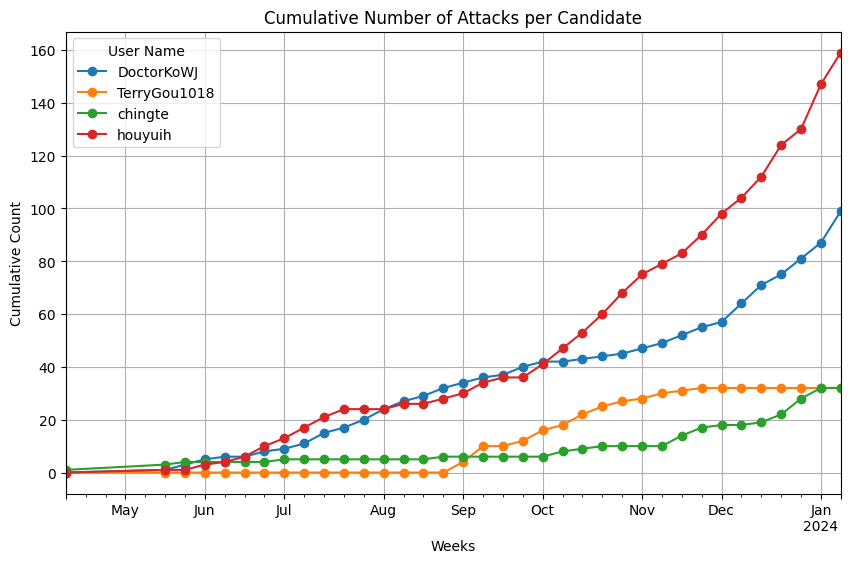

In [438]:
#plot df_attack_yes 
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Post Created' is the column containing the timestamp
df_attack_yes['Post Created'] = pd.to_datetime(df_attack_yes['Post Created'])

# Create a new column for the week
df_attack_yes['Week'] = df_attack_yes['Post Created'].dt.to_period('W')

# Group by 'Week' and 'User Name', then count occurrences
grouped_data = df_attack_yes.groupby(['Week', 'User Name']).size().reset_index(name='Count')

# Pivot the DataFrame to have 'User Name' as columns
pivot_data = grouped_data.pivot(index='Week', columns='User Name', values='Count').fillna(0)

# Create a cumulative sum for each column
cumulative_data = pivot_data.cumsum()

# Plotting
cumulative_data.plot.line(figsize=(10, 6), marker='o')

# Customize the plot
plt.title('Cumulative Number of Attacks per Candidate')
plt.xlabel('Weeks')
plt.ylabel('Cumulative Count')
plt.legend(title='User Name')
plt.grid(True)
plt.show()


In [439]:
cumulative_data

User Name,DoctorKoWJ,TerryGou1018,chingte,houyuih
Week,,,,
2023-04-10/2023-04-16,0.0,0.0,1.0,0.0
2023-05-15/2023-05-21,1.0,0.0,3.0,1.0
2023-05-22/2023-05-28,3.0,0.0,4.0,1.0
2023-05-29/2023-06-04,5.0,0.0,4.0,3.0
2023-06-05/2023-06-11,6.0,0.0,4.0,4.0
2023-06-12/2023-06-18,6.0,0.0,4.0,6.0
2023-06-19/2023-06-25,8.0,0.0,4.0,10.0
2023-06-26/2023-07-02,9.0,0.0,5.0,13.0
2023-07-03/2023-07-09,11.0,0.0,5.0,17.0


In [440]:
#show number of rows per User Name where attack is yes
main_df[main_df['attack']=='yes']['User Name'].value_counts()

User Name
houyuih         159
DoctorKoWJ       99
chingte          32
TerryGou1018     32
Name: count, dtype: int64

In [441]:
# Remove commas from 'Total Interactions' column
main_df['Total Interactions'] = main_df['Total Interactions'].str.replace(',', '')

# Convert 'Total Interactions' column to integer
main_df['Total Interactions'] = main_df['Total Interactions'].astype(int)

In [442]:


# Calculate the average Total Interactions of the rows where attack is yes
print(main_df[main_df['attack']=='yes']['Total Interactions'].mean())

# Also calculate the average Total Interactions of the rows where attack is no or NaN
print(main_df[main_df['attack']!='yes']['Total Interactions'].mean())


26279.18944099379
16189.363560732114


In [443]:
# Calculate the average Total Interactions grouped by User Name where attack is yes
print(main_df[main_df['attack']=='yes'].groupby('User Name')['Total Interactions'].mean())

# Calculate the average Total Interactions grouped by User Name where attack is no or NaN
print(main_df[main_df['attack']!='yes'].groupby('User Name')['Total Interactions'].mean())

User Name
DoctorKoWJ      33032.161616
TerryGou1018    14834.437500
chingte         23567.062500
houyuih         24923.691824
Name: Total Interactions, dtype: float64
User Name
DoctorKoWJ      20934.330472
TerryGou1018    10642.582677
chingte         15728.482173
houyuih         15676.806324
Name: Total Interactions, dtype: float64


In [444]:
#check by type 
# Calculate the average Total Interactions grouped by User Name where attack is yes
print(main_df.groupby('Type')['Total Interactions'].mean())

Type
Link             3835.000000
Native Video    24145.310680
Photo           17305.813248
Status          20200.145161
YouTube          3576.000000
Name: Total Interactions, dtype: float64


In [445]:
#check values for Type
main_df['Type'].value_counts()

Type
Photo           1253
Native Video     206
Status            62
YouTube            2
Link               1
Name: count, dtype: int64

In [446]:
#calculate the number of rows where Type == 'Live Video Complete'
print(len(main_df[main_df['Type']=='Live Video Complete']))

0


In [447]:
#create a new df where Type is not 'Live Video Complete' or 'Live Video Scheduled'
main_df_no_live=main_df[(main_df['Type']!='Live Video Complete') & (main_df['Type']!='Live Video Scheduled')]
print(len(main_df_no_live))

1524


In [448]:
# Calculate the average Total Interactions grouped by User Name where attack is yes
print(main_df_no_live[main_df_no_live['attack']=='yes'].groupby('User Name')['Total Interactions'].mean())

# Calculate the average Total Interactions grouped by User Name where attack is no or NaN
print(main_df_no_live[main_df_no_live['attack']!='yes'].groupby('User Name')['Total Interactions'].mean())

# Calculate the average Total Interactions of the rows where attack is yes
print(main_df_no_live[main_df_no_live['attack']=='yes']['Total Interactions'].mean())

# Also calculate the average Total Interactions of the rows where attack is no or NaN
print(main_df_no_live[main_df_no_live['attack']!='yes']['Total Interactions'].mean())


User Name
DoctorKoWJ      33032.161616
TerryGou1018    14834.437500
chingte         23567.062500
houyuih         24923.691824
Name: Total Interactions, dtype: float64
User Name
DoctorKoWJ      20934.330472
TerryGou1018    10642.582677
chingte         15728.482173
houyuih         15676.806324
Name: Total Interactions, dtype: float64
26279.18944099379
16189.363560732114


In [449]:
# Check how many rows in main_df_no_live contain the word '直播' in the combined_text column
print(len(main_df_no_live[main_df_no_live['combined_text'].str.contains('直播').fillna(False)]))

#calculate the average number of Total Interactions for rows where combined_text contains '直播'
print(main_df_no_live[main_df_no_live['combined_text'].str.contains('直播').fillna(False)]['Total Interactions'].mean())

#check how many of these rows have attack == 'yes'
print(len(main_df_no_live[(main_df_no_live['combined_text'].str.contains('直播').fillna(False)) & (main_df_no_live['attack']=='yes')]))

#check the mean of these rows
print(main_df_no_live[(main_df_no_live['combined_text'].str.contains('直播').fillna(False)) & (main_df_no_live['attack']=='yes')]['Total Interactions'].mean())


92
15066.70652173913
19
26050.263157894737


In [450]:
#count the number of rows that have NaN in the combined_text column
print(len(main_df_no_live[main_df_no_live['combined_text'].isna()]))

3


In [451]:
#create an extra column called 'combined_text_length' that contains the length of the combined_text column 
main_df_no_live['combined_text_length']=main_df_no_live['combined_text'].str.len()

In [452]:
#now create categories. category one is where combined_text_length is less than 300. category two is where combined_text_length is between 0 and 500, category 2 is between 500 and 1000, keep doing this until 5000
main_df_no_live['combined_text_length_category']=pd.cut(main_df_no_live['combined_text_length'], bins=[0, 300, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 5000], labels=['<300', '300-500', '500-1000', '1000-1500', '1500-2000', '2000-2500', '2500-3000', '3000-3500', '3500-4000', '4000-5000'])


In [453]:
#now calculate the average Total Interactions for each category
print(main_df_no_live[main_df_no_live['attack']=='yes'].groupby('combined_text_length_category')['Total Interactions'].mean())

combined_text_length_category
<300         23736.230769
300-500      22663.657534
500-1000     27382.117284
1000-1500    30638.240000
1500-2000    38868.125000
2000-2500    23805.272727
2500-3000    15418.000000
3000-3500    45954.000000
3500-4000             NaN
4000-5000    30287.000000
Name: Total Interactions, dtype: float64


In [454]:
# Create a new DataFrame that only contains the top 20 posts for each User Name
top_20_posts_df = main_df_no_live.groupby('User Name')['Total Interactions'].nlargest(20).reset_index()

# Merge with the original DataFrame to get the other columns
top_20_posts_df = main_df_no_live.merge(top_20_posts_df, how='inner', on=['User Name', 'Total Interactions'])

#check value counts for User Name
top_20_posts_df['User Name'].value_counts()


User Name
DoctorKoWJ      20
chingte         20
TerryGou1018    20
houyuih         20
Name: count, dtype: int64

In [455]:
#now check how many rows have attack == 'yes' for each candidate 
print(top_20_posts_df[top_20_posts_df['attack']=='yes']['User Name'].value_counts())

User Name
houyuih         17
DoctorKoWJ      14
TerryGou1018     8
chingte          1
Name: count, dtype: int64


In [ ]:
#print me all the sentences in main_df_no_live User Name houyuih 

In [458]:
#print the ‘serial_number’ for the post with the highestTotal Interactions and attack=='yes' for 賴清德


nan


In [374]:
#check how many posts User Name houyuih has in main_df
print(len(main_df[main_df['User Name']=='houyuih']))
#now check how many of those posts have attack == 'yes'
print(len(main_df[(main_df['User Name']=='houyuih') & (main_df['attack']=='yes')]))

412
159


In [459]:
#check in how many rows User Name == houyuih and attack == 'yes' and target contains 柯 OR 民眾黨
print(len(main_df[(main_df['User Name']=='houyuih') & (main_df['attack']=='yes') & (main_df['target'].str.contains('柯').fillna(False) | main_df['target'].str.contains('民眾黨').fillna(False))]))

8


# against who 

In [375]:
# main_df_no_live columns
main_df_no_live.columns

Index(['Unnamed: 0_x', 'serial_number', 'Page Name', 'User Name',
       'Facebook Id', 'Page Category', 'Page Admin Top Country',
       'Page Description', 'Page Created', 'Likes at Posting',
       'Followers at Posting', 'Post Created', 'Post Created Date',
       'Post Created Time', 'Type', 'Total Interactions', 'Likes', 'Comments',
       'Shares', 'Love', 'Wow', 'Haha', 'Sad', 'Angry', 'Care',
       'Video Share Status', 'Is Video Owner?', 'Post Views', 'Total Views',
       'Total Views For All Crossposts', 'Video Length', 'URL', 'Message',
       'Link', 'Final Link', 'Image Text', 'Link Text', 'Description',
       'Sponsor Id', 'Sponsor Name', 'Sponsor Category',
       'Total Interactions (weighted  —  Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x )',
       'Overperforming Score', 'combined_text', 'Unnamed: 0_y',
       'mention_other', 'mentioned_other', 'attack', 'target', 'description',
       'Overperforming Score (weighted  —  Likes 1

In [376]:
#main_df_no_live['target] value counts
main_df_no_live['target'].value_counts()

target
民進黨                                 129
民進黨, 賴                               32
藍綠                                   25
民進黨, 賴, 蔡                            15
賴                                    11
國民黨                                   7
民進黨, 執政黨/民進黨                          7
執政黨/民進黨                               7
民進黨, 蔡                                7
蔡                                     6
在野黨                                   5
民進黨, 國民黨                              4
民進黨, 藍綠                               4
藍白                                    4
民進黨, 綠營                               3
民進黨, 國民黨, 藍綠                          3
賴, 蔡                                  3
柯                                     3
馬英九                                   2
侯, 國民黨                                2
民進黨, 賴, 侯                             2
侯, 柯                                  2
賴, 藍綠                                 2
民進黨, 柯                                2
侯, 國民黨, 柯, 馬英九, 朱, 趙             

In [377]:
#fix that the serial_number 1398 has a comma between 藍 and 白 in the target column, this should be 藍白
main_df_no_live.loc[main_df_no_live['serial_number'] == 1398, 'target'] = '在野黨, 藍白'
main_df_no_live = main_df_no_live[main_df_no_live['attack'] == 'yes']

In [378]:
# import pandas as pd

# # Assuming your DataFrame is named main_df_no_live
# # Assuming 'target' and 'attack' are the column names

# # Split the values in 'target' column
# unique_targets = set(target.strip() for targets in main_df_no_live['target'].str.split(',') for target in targets)
# unique_targets.discard('')  # Remove empty strings

# # Create new columns for each unique target
# for target in unique_targets:
#     main_df_no_live[target] = main_df_no_live['target'].apply(lambda x: 1 if target in x else 0)

# # Convert the set to a list before using it as an indexer
# unique_targets_list = list(unique_targets)

# # Sum the values across rows for each target
# main_df_no_live['total_targets'] = main_df_no_live[unique_targets_list].sum(axis=1)


In [379]:
import pandas as pd

# Assuming your DataFrame is named main_df_no_live
# Assuming 'target' and 'attack' are the column names

# Split the values in 'target' column
unique_targets = set(target.strip() for targets in main_df_no_live['target'].str.split(',') for target in targets)
unique_targets.discard('')  # Remove empty strings

# Create new columns for each unique target with 'target_' prefix
for target in unique_targets:
    main_df_no_live[f'target_{target}'] = main_df_no_live['target'].apply(lambda x: 1 if target in x else 0)

# Convert the set to a list before using it as an indexer
unique_targets_list = [f'target_{target}' for target in unique_targets]

# Sum the values across rows for each target
main_df_no_live['total_targets'] = main_df_no_live[unique_targets_list].sum(axis=1)


In [380]:
import numpy as np

# Update the 'target_民進黨' column based on the condition
main_df_no_live['target_民進黨'] = np.where((main_df_no_live['target_執政黨/民進黨'] == 1) & (main_df_no_live['target_民進黨'] != 1), 1, main_df_no_live['target_民進黨'])

# Drop the 'target_執政黨/民進黨' column
main_df_no_live = main_df_no_live.drop(columns=['target_執政黨/民進黨'])

In [381]:
import pandas as pd
import plotly.graph_objects as go

# Filter the DataFrame for the user 'houyuih'
df_houyuih = main_df_no_live[main_df_no_live['User Name'] == 'houyuih']

# Select columns that have 'target_' as a prefix
target_columns = [col for col in df_houyuih.columns if col.startswith('target_')]

# Calculate the cumulative values for each 'target_' column
cumulative_values = df_houyuih[target_columns].sum().tolist()

# Create labels with cumulative values
labels_with_values = [f"{col} ({val})" for col, val in zip(target_columns, cumulative_values)]

# Create the Sankey chart
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ['houyuih'] + labels_with_values,  # Include 'houyuih' in the labels
      color = "blue"
    ),
    link = dict(
      source = [0]*len(target_columns),  # All links start from the first node ('houyuih')
      target = list(range(1, len(target_columns) + 1)),  # Links end at each 'target_' node
      value = cumulative_values
    )
)])

fig.update_layout(title_text="侯友宜抹黑貼文的對方", font_size=11)
fig.show()

In [382]:
# #print the combined text where Username == 'houyuih' and target_藍白 == 1.
# #it is too long, save it to a txt file
# print(df_houyuih[df_houyuih['target_藍白']==1]['combined_text'])

# #


In [383]:
# # Update the 'target_民進黨' column based on the condition
# main_df_no_live['target_民進黨'] = np.where((main_df_no_live['target_執政黨/民進黨'] == 1) & (main_df_no_live['target_民進黨'] != 1), 1, main_df_no_live['target_民進黨'])

# # Drop the 'target_執政黨/民進黨' column
# main_df_no_live = main_df_no_live.drop(columns=['target_執政黨/民進黨'])

#Update the 'target_民進黨' column based on the condition
main_df_no_live['target_國民黨'] = np.where((main_df_no_live['target_在野黨/國民黨'] == 1) & (main_df_no_live['target_國民黨'] != 1), 1, main_df_no_live['target_國民黨'])

# Drop the 'target_執政黨/民進黨' column
main_df_no_live = main_df_no_live.drop(columns=['target_在野黨/國民黨'])

#Update the 'target_民進黨' column based on the condition
main_df_no_live['target_馬英九'] = np.where((main_df_no_live['target_馬前總統'] == 1) & (main_df_no_live['target_馬英九'] != 1), 1, main_df_no_live['target_馬英九'])

# Drop the 'target_執政黨/民進黨' column
main_df_no_live = main_df_no_live.drop(columns=['target_馬前總統'])

In [384]:
import pandas as pd
import plotly.graph_objects as go

# Filter the DataFrame for the user 'chingte'
df_houyuih = main_df_no_live[main_df_no_live['User Name'] == 'chingte']

# Select columns that have 'target_' as a prefix
target_columns = [col for col in df_houyuih.columns if col.startswith('target_')]

# Calculate the cumulative values for each 'target_' column
cumulative_values = df_houyuih[target_columns].sum().tolist()

# Create labels with cumulative values
labels_with_values = [f"{col} ({val})" for col, val in zip(target_columns, cumulative_values)]

# Create the Sankey chart
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ['chingte'] + labels_with_values,  # Include 'houyuih' in the labels
      color = "green"
    ),
    link = dict(
      source = [0]*len(target_columns),  # All links start from the first node ('houyuih')
      target = list(range(1, len(target_columns) + 1)),  # Links end at each 'target_' node
      value = cumulative_values
    )
)])

fig.update_layout(title_text="賴清德抹黑貼文的對方", font_size=10)
fig.show()

In [385]:
import pandas as pd
import plotly.graph_objects as go

# Filter the DataFrame for the user 'chingte'
df_houyuih = main_df_no_live[main_df_no_live['User Name'] == 'DoctorKoWJ']

# Select columns that have 'target_' as a prefix
target_columns = [col for col in df_houyuih.columns if col.startswith('target_')]

# Calculate the cumulative values for each 'target_' column
cumulative_values = df_houyuih[target_columns].sum().tolist()

# Create labels with cumulative values
labels_with_values = [f"{col} ({val})" for col, val in zip(target_columns, cumulative_values)]

# Create the Sankey chart
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ['DoctorKoWJ'] + labels_with_values,  # Include 'houyuih' in the labels
      color = "lightblue"
    ),
    link = dict(
      source = [0]*len(target_columns),  # All links start from the first node ('houyuih')
      target = list(range(1, len(target_columns) + 1)),  # Links end at each 'target_' node
      value = cumulative_values
    )
)])

fig.update_layout(title_text="柯文哲抹黑貼文的對方'", font_size=10)
fig.show()

In [386]:
#save main_df_no_live as a csv
#main_df_no_live.to_csv('/Users/jasperhewitt/Desktop/github_repos/Campaigning_101/data/all_attacks.csv', index=False)

In [387]:
#ok now run the word clouds and the topic model... 
main_df_no_live.columns

Index(['Unnamed: 0_x', 'serial_number', 'Page Name', 'User Name',
       'Facebook Id', 'Page Category', 'Page Admin Top Country',
       'Page Description', 'Page Created', 'Likes at Posting',
       'Followers at Posting', 'Post Created', 'Post Created Date',
       'Post Created Time', 'Type', 'Total Interactions', 'Likes', 'Comments',
       'Shares', 'Love', 'Wow', 'Haha', 'Sad', 'Angry', 'Care',
       'Video Share Status', 'Is Video Owner?', 'Post Views', 'Total Views',
       'Total Views For All Crossposts', 'Video Length', 'URL', 'Message',
       'Link', 'Final Link', 'Image Text', 'Link Text', 'Description',
       'Sponsor Id', 'Sponsor Name', 'Sponsor Category',
       'Total Interactions (weighted  —  Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x )',
       'Overperforming Score', 'combined_text', 'Unnamed: 0_y',
       'mention_other', 'mentioned_other', 'attack', 'target', 'description',
       'Overperforming Score (weighted  —  Likes 1

In [388]:
pip install pandas bertopic


[notice] A new release of pip is available: 23.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# topic modelling (not working)

In [389]:
pip install pandas jieba nltk gensim



[notice] A new release of pip is available: 23.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [390]:
!pip install gensim


[notice] A new release of pip is available: 23.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [391]:
#read in the csv
attack=pd.read_csv('/Users/jasperhewitt/Desktop/github_repos/Campaigning_101/data/all_attacks.csv')
attack_hou= attack[attack['User Name']=='houyuih']
len(attack_hou)

159

In [392]:
import ssl
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import nltk

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('wordnet')
nltk.download('stopwords')


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jasperhewitt/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jasperhewitt/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [393]:
import gensim
import jieba
import pandas as pd

# Assuming stopwords is your custom stopwords list
stopwords = ['告訴', '願意', '推動', '承諾', '這片', '再次', '最大', '中央', '重要', '到底', '建設', '期待', '帶給', '趙少康', '選舉', '立刻', '必須', '清德', '清楚',
                    '變成', '絕對', '區域', '侯友', '選擇', '更是', '主席', '不能', '確是', '還給', "執政", "總統", "國民黨", "2024", "政治", "如今", "在此", '最後', '全國',
                    "賴清德", "中華民國", "宜來", "未來", "侯友宜", "政黨", "一定", "民眾", "就讓", "民進黨", "人民", "政府", "國家", "報導", "可能", "指出", "認為", "新聞網", "國際",
                    "應該", "可能", "提出", "過去", "現在", "進行", "今天", "相關", "社會", "議題", "很多", "undo", "需要", "需求", "已經", "目前", "今年", "透過", "地方", "沒有",
                    "記者", "成為", "持續", "市場", "表示", "台灣", "造成", "不少", "原因", "影響", "問題", "/", "10", "20", "30", "一起", "市長", "市民", "朋友", "城市", "12", "11",
                    "https"]

def preprocess(text):
    result = []
    for token in jieba.cut(text):
        if token not in stopwords and len(token) > 3:
            result.append(token)
    return result

processed_docs = attack_hou['combined_text'].map(preprocess)

# Create Dictionary
dictionary = gensim.corpora.Dictionary(processed_docs)

# Create Corpus
texts = processed_docs

# Term Document Frequency
corpus = [dictionary.doc2bow(text) for text in texts]

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=dictionary,
                                       num_topics=5, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

# Get the top terms for each topic
topic_terms = lda_model.show_topics(num_topics=5, num_words=10, formatted=False)

# Convert to DataFrame
topics_df = pd.DataFrame()

for i, topic in topic_terms:
    terms = [term for term, _ in topic]
    term_weights = [weight for _, weight in topic]
    
    topic_df = pd.DataFrame({
        'topic': [i]*len(terms),
        'term': terms,
        'weight': term_weights
    })
    
    topics_df = pd.concat([topics_df, topic_df])

print(topics_df)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/kf/vzjyh1g17x3gw7hgly31fnc80000gn/T/jieba.cache
Loading model cost 0.369 seconds.
Prefix dict has been built successfully.


   topic      term    weight
0      0      蔣萬安市  0.031542
1      0      台澎金馬  0.020036
2      0      心理健康  0.019998
3      0      青天白日  0.016173
4      0      觀光產業  0.016146
5      0      革命先烈  0.012307
6      0      1800  0.012304
7      0      基層民眾  0.009882
8      0      英九總統  0.008488
9      0      民主自由  0.008479
0      1      yuih  0.034965
1      1      2025  0.023496
2      1      中央政府  0.022969
3      1      二分之一  0.015944
4      1      再生能源  0.015906
5      1      基層民眾  0.014541
6      1      賴皮諾丘  0.012147
7      1     最後一哩路  0.012144
8      1      2016  0.008366
9      1      發電選項  0.008352
0      2      yuih  0.050275
1      2      台澎金馬  0.016024
2      2      保家衛國  0.012228
3      2      有心人士  0.012205
4      2    0.125%  0.012205
5      2      根本大法  0.012198
6      2      2300  0.008399
7      2     GDP8%  0.008396
8      2      挺身而出  0.008394
9      2      王惠美縣  0.008393
0      3      凱達格蘭  0.022853
1      3     最後一哩路  0.015485
2      3      台澎金馬  0.015479
3      3      

In [394]:
!pip install pyLDAvis


[notice] A new release of pip is available: 23.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [395]:
#other visualizations! figure out how to read this!
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

pyLDAvis.enable_notebook()

vis = gensimvis.prepare(lda_model, corpus, dictionary)
vis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.150263 -0.061331       1        1  24.880536
3      0.051506  0.006408       2        1  19.649322
2      0.077138  0.013752       3        1  18.687754
1      0.062863 -0.085571       4        1  18.676940
0     -0.041244  0.126741       5        1  18.105449, topic_info=     Term       Freq      Total Category  logprob  loglift
129  yuih  16.000000  16.000000  Default  30.0000  30.0000
78   蔣萬安市   6.000000   6.000000  Default  29.0000  29.0000
413  凱達格蘭   4.000000   4.000000  Default  28.0000  28.0000
0    2025   5.000000   5.000000  Default  27.0000  27.0000
125  心理健康   3.000000   3.000000  Default  26.0000  26.0000
..    ...        ...        ...      ...      ...      ...
251  龐大光電   0.713255   1.830521   Topic5  -5.3777   0.7664
64   經濟產業   0.713156   2.435345   Topic5  -5.3779   0.4808
382  今天下午   0.713009   3.159243   Topic5  -5.3781   0.2204
69   人口比例   0.712944   1.881941   Topic5  -5.3782   0.7383
344  共同努力   0.712935   1.881947   Topic5  -5.3782   0.7383

[270 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
373       3  0.818722  0.125%
374       3  0.545016    0.5%
171       3  0.815139    11.1
405       3  0.545016    1250
142       1  0.510905    150%
...     ...       ...     ...
12        5  0.196426    青天白日
140       5  0.833092    革命先烈
323       4  0.546678    風風雨雨
251       2  0.546292    龐大光電
251       5  0.546292    龐大光電

[299 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 3, 2, 1])

In [396]:
99+32+159+32



322